# 파이토치 기초

## 2.1 파이토치 개요

파이토치는 2017년에 공개된 딥러닝 프레임워크로 루아로 개발된 토치를 페이스북에서 파이썬 버전으로 내놓은 것이다.
- 넘파이를 대체하면서 GPU를 이용한 연산이 필요한 경우
- 최대한의 유연성과 속도를 제공하는 딥러닝 연구 플랫폼이 필요한 경우

### 2.1.1 파이토치 특징 및 장점

**GPU에서 텐서 조작 및 동적 신경망 구축이 가능한 프레임워크**

- GPU(Graphics Processing Unit) : 연산 속도를 빠르게 하는 역할
    - 딥러닝에서는 기울기 계산할 때 미분을 쓰는데, GPU를 사용하면 빠른 계산이 가능
    - 내부적으로 CUDA, cuDNN이라는 API를 통해 GPU를 연산에 사용할 수 있음
    - 병렬 연산에서 GPU의 속도는 CPU의 속도보다 훨씬 빠르므로 딥러닝 학습에서 GPU 사용은 필수
- 텐서(Tensor) : 파이토치 텐서의 의미는 다음과 같다.
    - 텐서는 파이토치의 데이터 형태
    - 텐서는 단일 데이터 형식으로 된 자료들의 다차원 행렬
    - 텐서는 간단한 명령어를 사용해서 GPU로 연산을 수행하게 할 수 있다.
- 동적 신경망 : 훈련을 반복할 때 마다 네트워크 변경이 가능한 신경망을 의미
    - 학습 중에 은닉층을 추가하거나 제거하는 등 모델의 네트워크 조작이 가능
    - 연산 그래프를 정의하는 것과 동시에 값도 초기화하는 `Define by Run` 방식을 사용한다.
    - 따라서 연산 그래프와 연산을 분리해서 생각할 필요가 없기 때문에 코드 이해가 쉽다.

**연산그래프**
- 연산 그래프는 방향성이 있으며 변수를 의미하는 **노드**와 연산을 담당하는 **엣지**로 구성됨
- 신경망은 연산그래프를 이용하여 계산을 수행
- 네트워크가 학습될 때 손실함수의 기울기가 가중치와 바이어스를 기반으로 계싼되며, 이후 경사 하강법을 사용하여 가중치가 업데이트 된다. 이때 연산그래프를 이용하여 효과적으로 수행된다.

<img src="http://www.stechstar.com/user/zbxe/files/attach/images/3151/874/074/c85064b5e784721c34907a936b08f81f.png">


**파이토치 사용자 API**
- torch : GPU를 지원하는 텐서 패키지
    - 다차원 텐서를 기반으로 다양한 수학적 연산 가능
    - GPU기반으로 빠른 연산 가능
- torch.autograd : 자동 미분 패키지
    - 다른 딥러닝 프레임워크와의 차이가 autograd의 기능
    - 신경망에 변화가 생기면 처음부터 다시 구축해야하나 파이토치는 자동미분으로 미분 계산을 효율적으로 처리함
    - 연산 그래프가 실시간으로 계산되기에 사용자는 다양한 신경망을 적용할 수 있음
- torch.nn : 신경망 구축 및 훈련 패키지
    - 합성곱, 순환, 정규화 등이 포함되어 쉽게 신경망을 구축해 학습시킬 수 있음
- torch.multiprocessing : 파이썬 멀티프로세싱 패키지
    - 파이토치 프로세스 전반에 걸쳐 텐서의 메모리 공유 가능
- torch.utils : DataLoader 및 기타 유틸리티를 제공
    - torch.utils.data.DataLoader 모듈 주로 사용
    - torch.utils.bottleneck : 병목 현상 디버깅
    - torch.utils.checkpoint : 모델 또는 모델의 일부를 검사
    - 등등
    

**텐서 메모리 저장**
- 텐서의 차원이 어떻든 메모리에 저장할 땐 1차원 배열 형태로 저장된다. 1차원 배열 형태여야만 메모리에 저장할 수 있기 때문이다.
- 변환된 1차원 배열을 스토리지(storage)라고 한다.
- 오프셋(offset) : 텐서에서 첫 번째 요소가 스토리지에 저장된 인덱스
- 스트라이드(stride) : 각 차원에 따라 다음 요소를 얻기 위해 건너뛰기(skip)가 필요한 스토리지의 요소 개수. 즉, 스트라이드는 메모리에서의 텐서 레이아웃을 표현하는 것으로 이해하면 된다. 요소가 연속적으로 저장되기 때문에 행 중심으로 스트라이드는 항상 1이다.

## 2.2 파이토치 기초 문법

### 2.2.1 텐서 다루기

#### 텐서 생성

torch.tensor에 원하는 형태(n by m)의 배열을 넣어주면 텐서를 생성

In [2]:
import torch
print(torch.tensor([[1, 2], [3, 4]])) # 2차원 형태의 텐서 생성, 데이터형은 자동으로 유추
print(torch.tensor([[1, 2], [3, 4]], device="cuda")) # GPU에 텐서 생성
print(torch.tensor([[1, 2], [3, 4]], dtype=torch.float64)) # dtype을 이용해 텐서 생성

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]], device='cuda:0')
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


#### 넘파이배열로부터 텐서 생성
- ndarray로부터 torch.from_numpy(np_array)로 생성

In [3]:
import numpy as np
np_array = np.array([[1, 2], [3, 4]])
print(torch.from_numpy(np_array))

tensor([[1, 2],
        [3, 4]])


#### 무작위(random) 또는 상수(constant) 값을 사용하기
- `shape` 은 텐서의 차원(dimension)을 나타내는 튜플(tuple)로, 아래 함수들에서는 출력 텐서의 차원을 결정

In [4]:
shape = (3, 4,)
print(torch.rand(shape)) # 3x4 rand tensor
print(torch.ones(shape)) # 3x4 ones tensor
print(torch.zeros(shape)) # 3x4 zeros tensor

tensor([[0.5470, 0.4650, 0.5406, 0.5394],
        [0.7749, 0.0652, 0.8574, 0.6679],
        [0.6975, 0.9972, 0.0590, 0.0628]])
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


#### 텐서의 속성(Attribute)
- 텐서의 속성은 텐서의 모양(shape), 자료형(datatype) 및 어느 장치에 저장되는지를 나타냄

In [5]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


- 텐서의 자료형
    - torch.FloatTensor : 32비트 부동 소수점
    - torch.DoubleTensor : 64비트의 부동 소수점
    - torch.LongTensor : 64비트 부호가 있는 정수

#### 텐서 GPU 할당

In [6]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = 'CPU'

In [7]:
print(device)

cuda


In [8]:
tensor = torch.rand(3,4)
tensor.to(device)

tensor([[0.9921, 0.7450, 0.5207, 0.6484],
        [0.1932, 0.6030, 0.4485, 0.9345],
        [0.2436, 0.6971, 0.3218, 0.2105]], device='cuda:0')

#### 텐서 연산
- 텐서 간 타입이 같아야지 연산이 가능하다. (FloatTensor, DoubleTensor간 연산 불가)

In [10]:
# 두 텐서 간의 행렬 곱(matrix multiplication)을 계산합니다. y1, y2, y3은 모두 같은 값을 갖습니다.
# 일반적인 행렬의 곱과 같다.
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)
print("y1 : ", y1)
print("y2 : ", y2)

y3 = torch.rand_like(y1)
print("y3 : ", torch.matmul(tensor, tensor.T, out=y3))


# 요소별 곱(element-wise product)을 계산합니다. z1, z2, z3는 모두 같은 값을 갖습니다.
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

y1 :  tensor([[2.2309, 1.4804, 1.0651],
        [1.4804, 1.4753, 0.8085],
        [1.0651, 0.8085, 0.6931]])
y2 :  tensor([[2.2309, 1.4804, 1.0651],
        [1.4804, 1.4753, 0.8085],
        [1.0651, 0.8085, 0.6931]])
y3 :  tensor([[2.2309, 1.4804, 1.0651],
        [1.4804, 1.4753, 0.8085],
        [1.0651, 0.8085, 0.6931]])


tensor([[0.9843, 0.5551, 0.2711, 0.4204],
        [0.0373, 0.3637, 0.2011, 0.8732],
        [0.0593, 0.4859, 0.1036, 0.0443]])

#### item()
tensor.item() : 파이썬 자료형으로 변환\
only one element tensors can be converted to Python scalars

In [13]:
print(tensor)
print("-------------------------------")
agg = tensor.sum()
print(agg, type(agg))
agg_item = agg.item()
print("-------------------------------")
print(agg_item, type(agg_item))

tensor([[0.9921, 0.7450, 0.5207, 0.6484],
        [0.1932, 0.6030, 0.4485, 0.9345],
        [0.2436, 0.6971, 0.3218, 0.2105]])
-------------------------------
tensor(6.5585) <class 'torch.Tensor'>
-------------------------------
6.558465003967285 <class 'float'>


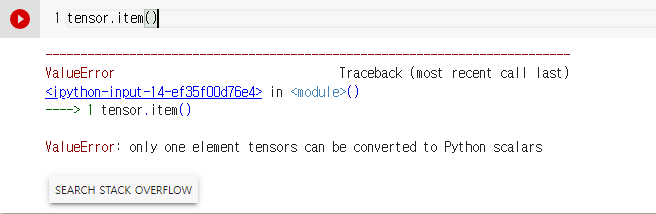

#### 텐서 차원 변경
- view
- stack
- cat
- transpose

In [16]:
tmp = torch.rand((2,2))

In [17]:
print(tmp.shape) # 2x2
print(tmp.view(4,1)) # 4x1
print(tmp.view(-1)) # 1차원변환
print(tmp.view(1, -1)) # 1행인 벡터 생성, -1은 앞에 1로 차원을 만들고 나머지는 어떻게 해야하는지 자동판단
print(tmp.view(-1, 1))

torch.Size([2, 2])
tensor([[0.1114],
        [0.9123],
        [0.1048],
        [0.1481]])
tensor([0.1114, 0.9123, 0.1048, 0.1481])
tensor([[0.1114, 0.9123, 0.1048, 0.1481]])
tensor([[0.1114],
        [0.9123],
        [0.1048],
        [0.1481]])


### 2.2.2 데이터 준비

대표적인 데이터 준비 방법
- 판다스 이용하는 방법
- 파이토치 제공 데이터 사용
- 이미지 로드 : 분산 데이터 베이스에서 읽고 배치 단위로 분할 처리
- 텍스트 로드 : 임베딩 과정 후 서로 다른 길이의 시퀀스를 배치 단위로 분할 처리

#### 판다스

```python
import pandas as pd
import numpy as np
import torch

data = pd.read_csv("something_file.csv")

x = torch.from_numpy(data['x'].values).unsqueeze(dim=1).float()
y = torch.from_numpy(data['y'].values).unsqueeze(dim=1).float()
```

#### 커스텀 데이터셋 만들기

딥러닝은 대용량 데이터를 다룬다. 하지만 학습시 데이터를 한번에 로드해서 쓰기엔 부담스럽다. 따라서 데이터를 조금씩 나눠서 필요할 때 불러 쓰는데 이를 커스텀 데이터셋(custom dataset)이라고 한다.

다음의 형태처럼 구현한다.
```python
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self): # 필요 변수 선언, 데이터셋 전처리
        pass
    def __len__(self) : # 데이터셋 길이, 총 샘플의 수를 가져오는 함수(매직 메소드)
        pass
    # 데이터셋에서 특정 데이터를 가져오는 함수(index 번째 데이터를 반환하는 함수, 이때 반환되는 값은 텐서의 형태를 취해야 한다.)
    def __getitem__(self, index):
        pass
```

다음은 csv파일을 불러와서 커스텀 데이터셋을 만드는 예제다.

```python
import pandas as pd
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset):
    def __init__(self, csv_file):
        self.label = pd.read_csv(csv_file)

    def __len__(self):
        return len(self.label)

    def __getitem__(self, idx):
        sample = torch.tensor(self.label.iloc[idx, 0:3]).int()
        label = torch.tensor(self.label.iloc[idx, 3]).int()
        return sample, label


tensor_dataset = CustomDataset("something_csv.csv")
dataset = DataLoader(tensor_dataset, batch_size=4, shuffle=True)

```

**torch.utils.data.DataLoader**
- 데이터로더 객체는 학습에 사용될 데이터 전체를 보관했다가 모델 학습을 할 때 배치 크기만큼 데이터를 꺼내서 사용한다. 이때 주의할 것은 데이터를 미리 잘라 놓는 것이 아니라 내부적으로 iterator에 포함된 인덱스를 이용해 배치 크기만큼 데이터를 반환해주는 것임

#### 파이토치 제공 데이터셋 사용

- torchvision은 파이토치에서 제공하는 데이터셋이 모여 있는 곳
- MNIST, ImageNet을 포함한 유명한 데이터셋들을 제공
- 요청하려면 requests 모듈 필요한데 아나콘다는 기본으로 설치됨

In [19]:
import torchvision.transforms as transforms

mnist_transforms = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize((0.5,), (1.0,))]) # 평균 0.5, 표주편차 1.0이 되도록 노멀라이즈

from torchvision.datasets import MNIST

train_dataset = MNIST('./', transform=mnist_transforms, train=True, download=True)
valid_dataset = MNIST('./', transform=mnist_transforms, train=False, download=True)
test_dataset = MNIST('./', transform=mnist_transforms, train=False, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



### 2.2.3 모델 정의
모델 정의를 위해 모듈(module)을 상속한 클래스를 사용

- 계층(layer) : 모듈 또는 모듈을 구성하는 한 개의 계층으로 합성곱층, 선형계층 등이 있음
- 모듈(module) : 한 개 이상의 계층이 모여서 구성된 것으로, 모듈이 모여 새로운 모듈을 만들 수도 있음
- 모델(model) : 최종적으로 원하는 네트워크로, 한 개의 모듈이 모델이 될 수 있음

#### 단순 신경망 정의
- nn.Module을 상속받지 않고 사용할 때

```python
model = nn.Linear(in_features=1, out_features=1, bias=True)
```

#### nn.Module() 상속하여 정의
- nn.Module을 상속받는 모델은 기본적으로 `__init__()`과 `forward()`함수로 구성됨
- `__init__()`에서는 레이어 설정, 초기값 설정 등
- `forward()`는 실제 연산이 일어나는 부분

In [20]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self, inputs):
        super(MLP, self).__init__()
        self.layer = nn.Linear(inputs, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.layer(x)
        x = self.activation(x)
        return x

#### Sequential 신경망 정의
- nn.Sequential을 사용하면 `__init__()`에 사용할 네트워크 모델들을 정의 해줄 뿐만 아니라 forward() 함수에서는 모델에서 실행되어야 할 계산을 좀더 가독성 있게 작성을 도와줌

In [24]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        self.layer3 = nn.Sequential(
            nn.Linear(in_features=30*5*5, out_features=10, bias=True),
            nn.ReLU(inplace=True)
        )
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.shape[0], -1)
        x = self.layer3(x)
        return x

model = MLP()

print(list(model.children()), "\n\n")
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)] 


[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
  

#### 함수로 신경망 정의

In [26]:
def MLP(in_features=1, hidden_features=20, out_features=1):
    hidden = nn.Linear(in_features=in_features, out_features=hidden_features, bias=True)
    activation = nn.ReLU()
    output = nn.Linear(in_features=hidden_features, out_features=out_features, bias=True)
    net = nn.Sequential(hidden, activation, output)
    return net

model = MLP()
print(MLP())

Sequential(
  (0): Linear(in_features=1, out_features=20, bias=True)
  (1): ReLU()
  (2): Linear(in_features=20, out_features=1, bias=True)
)


### 2.2.4 모델 파라미터 정의

#### 손실 함수(loss function)
- 학습하는 동안 출려과 실제 값 사이의 오차 측정
- BCELoss : 이진 분류를 위해 사용 (바이너리 크로스 엔트로피)
- CrossEntropyLoss : 다중 클래스 분류를 위해 사용
- MSELoss : 회귀 모델에서 사용

#### 옵티마이저(optimizer)
- 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법 결정
- optimizer는 step() 메소드를 통해 전달받은 파라미터를 업데이트 한다.
- 모델의 파라미터별로 다른 기준을 적용시킬 수 있다.
- torch.optim.Optimizer(params, defaults)는 모든 옵티마이저의 기본 클래스
- zero_grad() 메소드는 옵티마이저에 사용된 파라미터들의 기울기를 0으로 만든다.
- torch.optim.lr_scheduler는 에포크에 따라 학습률을 조절할 수 있게 해준다.
- 옵티마이저 종류
    - optim.Adadelta, optim.Adagrad, optim.Adam, optim.SparseAdam, optim.Adamax
    - optim.ASGD, optim.LBFGS
    - optim.RMSProp, optim.Rprop, optim.SGD

#### 학습률 스케줄러(learning rate scheduler)
미리 지정한 횟수의 에포크를 지날 때마다 학습률을 감소(decay)시켜 준다. \초기엔 빠른 학습을 하다 global minimum에 도달할때 쯤 학습률을 줄여 최적점을 찾을 수 있도록 해준다.
- optim.lr_scheduler.LambdaLR
    - 람다 함수를 이용하여 그 함수의 결과를 학습률로 지정
- optim.lr_scheduler.StepLR
    - 특정 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소 시킴
- optim.lr_scheduler.MultiStepLR
    - StepLR과 비슷하지만 특정 단계가 아닌 지정된 에포크에만 감마 비율로 감소시킴
- optim.lr_scheduler.ExponetialLR
    - 에포크마다 이전 학습률에 감마만큼 곱함
- optim.lr_scheduler.CosineAnnelingLR
    - 학습률을 코사인 함수의 형태처럼 변화시킨다. 따라서 학습률이 커지기도, 작아지기도 한다.
- optim.lr_scheduler.ReduceLROnPlateau
    - 학습이 잘 되고 있는지 아닌지에 따라 동적으로 학습률을 변화시킬 수 있음

#### 지표(metrics)
훈련과 테스트 단계를 모니터링 함 

예제)

```python
from torch.optim import optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer=optimzer, lr_lambda=lambda epoch : 0.95 ** epoch)

for epoch in range(1, 101):
    for x, y in dataloader:
        optimizer.zero_grad()
loss_fn(model(x, y).backward()
optimizer.step()
scheduler.step()
```

### 2.2.5 모델 훈련
모델 훈련 flow
- 모델, 손실 함수, 옵티마이저 정의
- optimizer.zero_grad() : 전방향 학습, 기울기 초기화
- output = model(input) : 출력 계산
- loss = loss_fn(output, target) : 오차 계산
- loss.backward() : 역전파 학습
- optimizer.step() : 기울기 업데이트

loss.backward()는 기울기를 자동으로 계산하는데, 배치가 반복될 때마다 오차가 중첩적으로 쌓이게 되므로 매번 zero_grad()를 사용해 미분 값을 0으로 초기화한다.

```python
for epoch in range(100):
    yhat = model(x_train)
    loss = criterion(yhat, y_train)
    optimizer.zero_grad()
    loss.bakcward()
    optimizer.step()
```

### 2.2.6 모델 평가


#### torchmetrics이용해 평가

```
pip install torchmetrics
```

In [28]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 419 kB 5.0 MB/s 


In [30]:
# torchmetrics 함수 이용
import torch
import torchmetrics

preds = torch.randn(10, 5).softmax(dim=1)
target = torch.randint(5, (10,))

acc = torchmetrics.functional.accuracy(preds, target)
print(acc)

tensor(0.2000)


In [31]:
# torchmetrics 모듈 이용
metric = torchmetrics.Accuracy() # 모델 평가 초기화

n_batches = 10
for i in range(n_batches):
    preds = torch.randn(10, 5).softmax(dim=-1)
    target = torch.randint(5, (10,))

    acc = metric(preds, target)
    print(f'Accuracy on batch {i}: {acc}')

acc = metric.compute()
print(f'Accuracy on all data: {acc}')

Accuracy on batch 0: 0.0
Accuracy on batch 1: 0.20000000298023224
Accuracy on batch 2: 0.10000000149011612
Accuracy on batch 3: 0.20000000298023224
Accuracy on batch 4: 0.4000000059604645
Accuracy on batch 5: 0.20000000298023224
Accuracy on batch 6: 0.10000000149011612
Accuracy on batch 7: 0.10000000149011612
Accuracy on batch 8: 0.10000000149011612
Accuracy on batch 9: 0.10000000149011612
Accuracy on all data: 0.15000000596046448


scikit-learn에서 제공하는 metrics 모듈 이용도 가능
- confusion_matrix
- accuracyt_score
- classification_report

### 2.2.6 훈련 과정 모니터링

#### 텐서보드 이용

```
pip install tensorboard
```

```python
import torch
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter('./tensorboard')

for epoch in range(num_epochs):
    model.train() # 학습 모드로 전환(dropout=True)
    batch_loss = 0.0

    for i, (x,y) in enumerate(dataloader):
        x, y = x.to(device).float(), y.to(device).float()
        outputs = model(x)
        loss = criterion(outputs, y)
        writer.add_scalar("Loss", loss, epoch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

writer.close()
```

```bash
tensorboard --logdir=./tensorboard --port=6006
```

`http://localhost:6006`